In [26]:
import ipywidgets as widgets
from IPython.display import display, HTML
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append("..") 
from utils import pull_data
from utils import plot_data_line_chart
from utils import create_pred_df
from utils import naive_random_walk
from utils import get_lag_values
from utils import xgboost
from utils import plot_oos

In [27]:
display(HTML("<h1>Stock Analysis App... Voila</h1>"))

In [ ]:
##USER INPUTS
ticker = "LEA"
print("Looking at Ticker: ", ticker)
days_of_trading_to_predict = 70
xgboost_weight = .85 # More stable
naive_weight = .15 # More random

Looking at Ticker:  AMZN


In [29]:

df = pull_data(ticker)
df = df.reset_index()
df['Date'] = df['Date'].dt.tz_localize(None).dt.date


## Plotting Historical Stock Price

In [30]:
## Ploting History 
# Create interactive date range pickers 
start_date_picker = widgets.DatePicker(description="Start Date", value=df['Date'].min())
end_date_picker = widgets.DatePicker(description="End Date", value=df['Date'].max())


# Use widgets.interactive correctly
interactive_plot = widgets.interactive(
    plot_data_line_chart, 
    df=widgets.fixed(df), 
    start_date=start_date_picker, 
    end_date=end_date_picker
)

interactive_plot

interactive(children=(DatePicker(value=datetime.date(2022, 4, 1), description='Start Date', step=1), DatePicke…

## Predicting Price (Xgboost + Random Walk Ensemble)

Predicting 70 trading days out


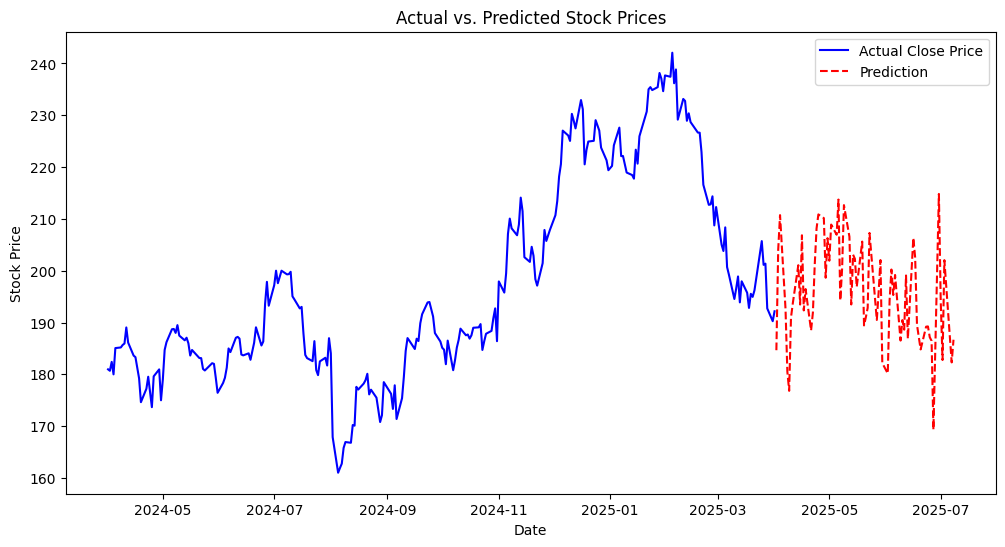

In [31]:
print(f'Predicting {days_of_trading_to_predict} trading days out')
pred_df = create_pred_df(df,days_of_trading_to_predict)

##Creating predictions
preds_naive = naive_random_walk(df, pred_df)
preds_xgboost = xgboost(df,pred_df,days_of_trading_to_predict)

## plotting predictions
pred_df['preds'] = (xgboost_weight * preds_xgboost['preds']) + (naive_weight * preds_naive['preds'])
plot_oos(df,pred_df)

In [32]:
display(HTML("<h3>Predictions:</h3>"))

In [33]:
pd.set_option('display.max_columns', None)
pred_df.set_index('dt').T

dt,2025-04-02,2025-04-03,2025-04-04,2025-04-07,2025-04-08,2025-04-09,2025-04-10,2025-04-11,2025-04-14,2025-04-15,2025-04-16,2025-04-17,2025-04-18,2025-04-21,2025-04-22,2025-04-23,2025-04-24,2025-04-25,2025-04-28,2025-04-29,2025-04-30,2025-05-01,2025-05-02,2025-05-05,2025-05-06,2025-05-07,2025-05-08,2025-05-09,2025-05-12,2025-05-13,2025-05-14,2025-05-15,2025-05-16,2025-05-19,2025-05-20,2025-05-21,2025-05-22,2025-05-23,2025-05-27,2025-05-28,2025-05-29,2025-05-30,2025-06-02,2025-06-03,2025-06-04,2025-06-05,2025-06-06,2025-06-09,2025-06-10,2025-06-11,2025-06-12,2025-06-13,2025-06-16,2025-06-17,2025-06-18,2025-06-20,2025-06-23,2025-06-24,2025-06-25,2025-06-26,2025-06-27,2025-06-30,2025-07-01,2025-07-02,2025-07-03,2025-07-07,2025-07-08
preds,184.656965,204.056306,210.724506,192.666774,180.563796,176.820002,190.960842,193.723746,201.060598,193.474975,206.837326,192.338266,196.458294,188.468581,191.932724,201.1353,208.149436,210.859774,210.140018,198.644198,206.274708,201.928313,208.904328,206.944034,213.726603,194.252168,200.403608,212.652448,206.558121,193.485302,203.098808,202.283583,196.875158,205.617685,189.442517,191.025171,192.832369,207.28635,190.498837,195.898988,202.056199,182.179489,180.161478,194.249165,200.227138,195.31188,199.178425,186.519298,190.467819,188.628341,199.079942,186.86759,206.348015,202.540347,189.56339,184.808799,189.200545,189.248533,187.163708,186.457127,169.325344,214.809417,194.143025,182.764998,202.039027,182.306598,186.679809


In [37]:
## Test Lag feature (Need to make sure that is right)
lag1 = 100
lag2 = 200
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-04-01,164.149506,165.826996,162.319504,163.559998,57090000,0.0,0.0
1,2022-04-04,164.125000,168.394501,163.205505,168.346497,49882000,0.0,0.0
2,2022-04-05,167.741501,168.110504,163.266006,164.054993,53728000,0.0,0.0
3,2022-04-06,161.650497,162.199997,157.254501,158.755997,79056000,0.0,0.0
4,2022-04-07,158.399994,160.078995,154.511505,157.784500,68136000,0.0,0.0
...,...,...,...,...,...,...,...,...
747,2025-03-26,205.839996,206.009995,199.929993,201.130005,32855300,0.0,0.0
748,2025-03-27,200.889999,203.789993,199.279999,201.360001,27317700,0.0,0.0
749,2025-03-28,198.419998,199.259995,191.880005,192.720001,52548200,0.0,0.0
750,2025-03-31,188.190002,191.330002,184.399994,190.259995,63547600,0.0,0.0


In [35]:
pred_df

,dt,preds
0,2025-04-02,184.656965
1,2025-04-03,204.056306
2,2025-04-04,210.724506
3,2025-04-07,192.666774
4,2025-04-08,180.563796
...,...,...
62,2025-07-01,194.143025
63,2025-07-02,182.764998
64,2025-07-03,202.039027
65,2025-07-07,182.306598


In [39]:
date_100_days_back = pred_df['dt'] - pd.Timedelta(days=lag1)

# Print the result
print(date_100_days_back)

0    2024-12-23
1    2024-12-24
2    2024-12-25
3    2024-12-28
4    2024-12-29
        ...    
62   2025-03-23
63   2025-03-24
64   2025-03-25
65   2025-03-29
66   2025-03-30
Name: dt, Length: 67, dtype: datetime64[ns]


### Get the first date (index 0).... then grab len of pred_df values... and make that lag value

In [40]:
close_price_100_days_back = df[df['Date'] == date_100_days_back]['Close']
close_price_100_days_back

ValueError: Can only compare identically-labeled Series objects

In [42]:
close_prices = []
    
for date in pred_df['dt']:
    # Calculate the date 100 days back
    date_100_days_back = date - pd.Timedelta(days=100)
    
    # Filter xgboost_df to get the 'Close' price for that date
    close_price = df[df['Date'] == date_100_days_back]['Close']
    
    if not close_price.empty:
        close_prices.append(close_price.iloc[0])  # Append the 'Close' price
    else:
        close_prices.append(None)  # Append None if no date matches

len(close_prices)

67